In [1]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X,y=mnist['data'],mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

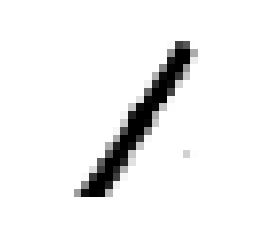

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[10000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [7]:
import numpy as np

In [8]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

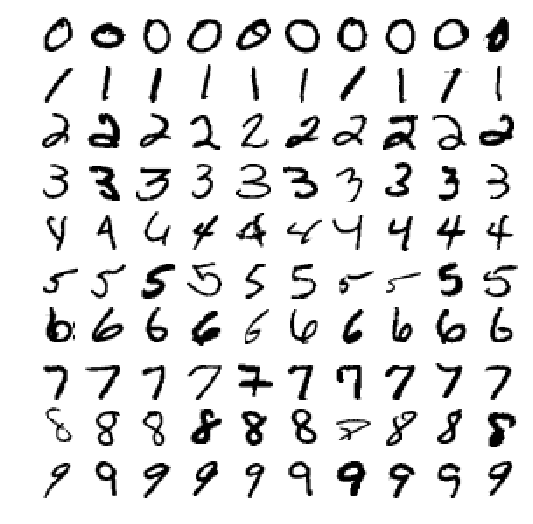

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [10]:
y[10000]

1.0

In [11]:
import numpy as np


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=30)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=30, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
X_train.shape

(60000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
sgd_clf.predict([some_digit])

array([ 1.])

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87792442,  0.88134407,  0.87183077])

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [20]:
skfolds = StratifiedKFold(n_splits=7, random_state=23)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.842743817079
0.972585160989
0.955319645357
0.96406486991
0.92801306732
0.949830824875
0.951114222378


In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=7,shuffle=True,random_state=23)

In [23]:
never5class=Never5Classifier()
cross_val_score(never5class,X_train,y_train_5, cv=kfold, scoring='accuracy')


array([ 0.90888941,  0.90433971,  0.9114559 ,  0.90736203,  0.91249562,
        0.91179559,  0.91121223])

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=kfold)

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52719,  1860],
       [  870,  4551]])

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)


0.70987365465605989

In [27]:
recall_score(y_train_5,y_train_pred)

0.83951300498063086

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76926977687626774

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[-504463.83447784,   97565.21454258,  -10079.33550461,
        -228822.78036223, -286298.09970892, -310503.75166047,
        -347758.70931007, -360789.01968542, -175810.64795757,
        -179234.27255908]])

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=25,
                             method="decision_function")

print(y_scores)

[-352619.39559916 -198046.25567238 -270637.38213175 ..., -335071.11634629
 -304562.64587529 -128007.47708871]


In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

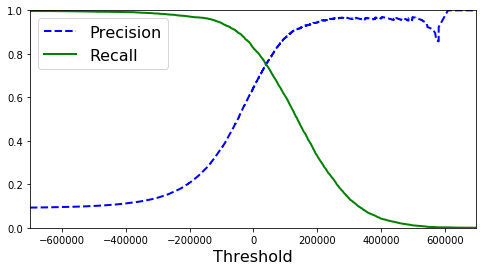

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

plt.show()